## AQ2 : Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

- Each piece of the cut should have an integer length
- He should at least cut the ribbon once
- The multiplication of the length of all the pieces be the maximum possible


In [143]:
#TODO demonstration of AQ2.2
#TODO maybe remove global variable from functions?

## AQ2.1: Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

This algorithm follows the same principle as the algorithm in the exercise AQ1. For every possible permutation of numbers in a range from i to n+1 i append it in an array and then i call the recursive function. 
In this way i will obtain every possible combination of subset that sum up to n. For every iteration of the recursive call i also compute the product of the value inside the array, and if it's greater than what i already have in the
global variable MAX, then i change the value of max to the new greater product.

In [1]:
import math

def findmax(n):              
    max = c([], 1, n)                       #1
    return max                              #1

def c(arr,i,n):
    global counter
    global m
    counter+=1
    if (n==0) and len(arr)>1:               #1
        product = math.prod(arr)            #len(arr) ---> (at most N)
        if product > m:                     #1
            m = product                     #1
    for j in range(i, n+1):                 #N
        counter+=1
        arr.append(j)                       #1
        c(arr, j, n-j)                      #1
        counter+=1
        arr.pop()                           #1
    return m                                #1
    

In [3]:
counter = 0
m = 0
findmax(7)

12

## AQ2.2: Show that the algorithm has exponential running time

To show that the algorithm above has an exponential running time, we will do a demonstration but first we will plot the counters for the recursive part of the algorithm related to the value of n.

We did an example with n going from 2 to 25 

In [18]:
 arrRecursive = []
 for n in range(2, 25):
     counter = 0
     m = 0
     arrRecursive.append(findmax(n))
     print(n, ":", m)
     #print("counter for ", n, ": ", counter)


2 : 1
3 : 2
4 : 4
5 : 6
6 : 9
7 : 12
8 : 18
9 : 27
10 : 36
11 : 54
12 : 81
13 : 108
14 : 162
15 : 243
16 : 324
17 : 486
18 : 729
19 : 972
20 : 1458
21 : 2187
22 : 2916
23 : 4374
24 : 6561


In [6]:
exponential = []
def expo(n):
    return 2**n

for x in range(2,25):
    exponential.append(expo(x))

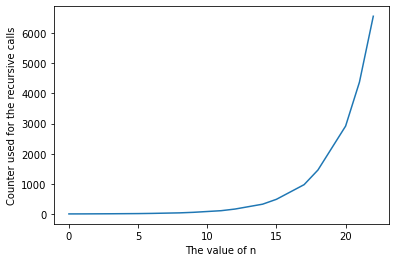

In [19]:
import matplotlib.pyplot as plt
plt.plot(arrRecursive)
plt.xlabel("The value of n")
plt.ylabel("Counter used for the recursive calls")
plt.show()

Demostration: (It should be O(2^N) )

## AQ2.3: Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [9]:
def dynProg(n):
    #base case
    arr = [-1,-1]
    arr.append(1)
    counter = 1
    for x in range(3, n+1):
        counter += 1
        arr.append(x//2 * (x//2+ x%2))
        for y in range(x-1, 2, -1):
            counter += 1
            if arr[x] < (arr[y])*(x-y):
                arr[x] = arr[y]*(x-y)
    return arr[n], counter


The Polynomial solution has a double foor loop with max n repetition, so the it's running time complexity shoud be O(N**2)

In [10]:
dynProg(8)

(18, 22)

## AQ2.4 Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

arr = []
for n in range(2, 25):

In [106]:
arrDynProg = []
for n in range(2, 25):
    arrDynProg.append(dynProg(n)[1])
    

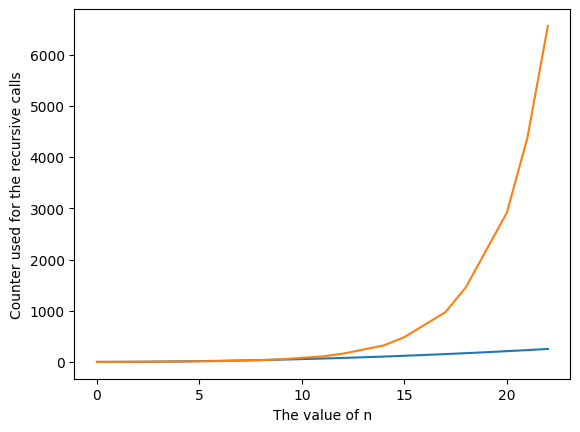

In [107]:
import matplotlib.pyplot as plt
plt.plot(arrDynProg)
plt.plot(arrRecursive)
#plt.plot(range(1,50))
plt.xlabel("The value of n")
plt.ylabel("Counter used for the recursive calls")
plt.show()

## AQ2.5 (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

The dynamic programming algorithm is not the optimal one, as this problem can be solved only by solving an equation.

The idea behind the following algorithm is that the max product of subpart of n is the product obtain with pieces of lenght 3 and 2. 
So the only check that we need to do, is to see if the number is divided by 3 and if not we need to do small fixes to the original formula

In [26]:
def optimal(n):
    r = n%3
    #original formula
    if r == 0:
        return 3**(n//3)
    #if the rest of the division is 1, then we need to remove one "3" from the final product and sum 3 with the rest of the divison, in this way we will have 3+1=4, that becomes 2 x 2 x 3^((n%3)-1)
    elif r == 1:
        return 3**((n//3)-1)*4
    #if the rest is 2, then we only need to add *2 at the end of the formula
    elif r == 2:
        return 3**((n//3))*2


In [31]:
for x in range(2,25):
     print(x, " :", optimal(x))

2  : 2
3  : 3
4  : 4
5  : 6
6  : 9
7  : 12
8  : 18
9  : 27
10  : 36
11  : 54
12  : 81
13  : 108
14  : 162
15  : 243
16  : 324
17  : 486
18  : 729
19  : 972
20  : 1458
21  : 2187
22  : 2916
23  : 4374
24  : 6561
